# ML_SP22_Project_3 (CNN)

### Due Date: 5/16 23:59 pm

**Name: Jay Mistry**

**CUNYID: 23859979**

In [1]:
import sys
import os
import platform 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report

### The goal for this Project is to practice running CNN using a set of dog and cat image

***Make sure you fill in the blank inside the TODO section and try at least two different choices for the following parameters. Summarize your findings briefly at the end of the notebook***

1. Define a first model, try two epoch choices and two batch size.
2. Add dropout to the first model to see if it helps or not, pick one of the epoch and batch size you had before
3. Try a second model with slighly different model arhitecture
4. Summarize your findings

### Loading the datasets

In [3]:
# download the dogsvscats.zip, save it under your notebook directory
# or somewhere else, change base_dir to where you save the datasets
base_dir = "./dogsvscats"

In [4]:
train_dataset = image_dataset_from_directory(
         os.path.join(base_dir, "train"),
        image_size=(180, 180),
        batch_size=32)

Found 2000 files belonging to 2 classes.


In [5]:
validation_dataset = image_dataset_from_directory(
        os.path.join(base_dir, "validation"),
        image_size=(180, 180),
        batch_size=32)

Found 1000 files belonging to 2 classes.


In [6]:
test_dataset = image_dataset_from_directory(
        os.path.join(base_dir, "test"),
        image_size=(180, 180),
        batch_size=1000)

Found 1000 files belonging to 2 classes.


In [7]:
images, labels = list(train_dataset.take(1))[0]
class_names = train_dataset.class_names

Text(0.5, 1.0, 'cat')

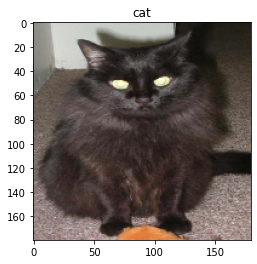

In [8]:
idx = 2
plt.imshow(images[idx].numpy().astype("uint8"))
plt.title(class_names[labels[idx].numpy()])

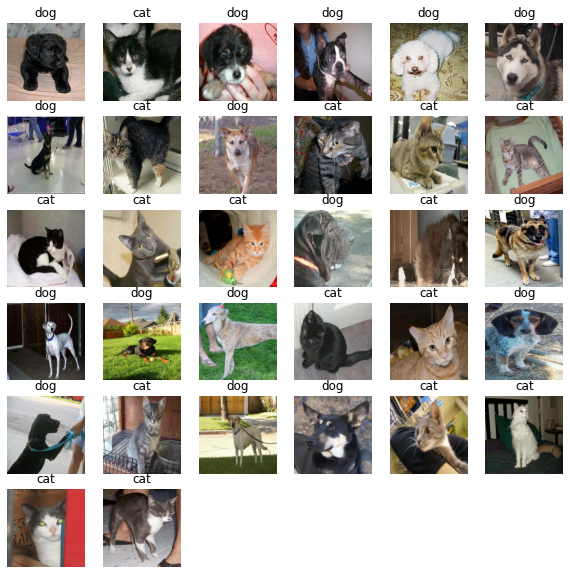

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(32):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i].numpy()])
    plt.axis("off")

# Plotting the images
plt.show()

### Define your first CNN model

In [10]:
# TODO: fill in the blank
inputs = keras.Input(shape=(180, 180, 3))

x = layers.Rescaling(1./255)(inputs)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu")(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu")(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 256, kernel_size = 3, activation = "relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(2, activation = "softmax")(x)

model = keras.Model(inputs = inputs, outputs = outputs)

### Comiple the model

In [11]:
# TODO: fill in the blank
model.compile(loss = "SparseCategoricalCrossentropy", optimizer = "adam", metrics = ["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        36928 

### Running the first model

In [12]:
# increase epochs
history = model.fit(
    train_dataset,
    epochs=20, 
    validation_data=validation_dataset)

Epoch 1/20
63/63 [==============================] - 90s 1s/step - loss: 1.1334 - accuracy: 0.5920 - val_loss: 0.6774 - val_accuracy: 0.5610
Epoch 2/20
63/63 [==============================] - 78s 1s/step - loss: 0.6103 - accuracy: 0.6615 - val_loss: 0.6432 - val_accuracy: 0.6110
Epoch 3/20
63/63 [==============================] - 78s 1s/step - loss: 0.5720 - accuracy: 0.7135 - val_loss: 0.6120 - val_accuracy: 0.6560
Epoch 4/20
63/63 [==============================] - 81s 1s/step - loss: 0.5221 - accuracy: 0.7445 - val_loss: 0.5876 - val_accuracy: 0.6710
Epoch 5/20
63/63 [==============================] - 79s 1s/step - loss: 0.4292 - accuracy: 0.7985 - val_loss: 0.6417 - val_accuracy: 0.6640
Epoch 6/20
63/63 [==============================] - 81s 1s/step - loss: 0.3553 - accuracy: 0.8455 - val_loss: 0.6092 - val_accuracy: 0.6940
Epoch 7/20
63/63 [==============================] - 87s 1s/step - loss: 0.2409 - accuracy: 0.9055 - val_loss: 0.7753 - val_accuracy: 0.6710
Epoch 8/20
63/63 [==

### Now, look at the testing dataset

In [13]:
test_images, test_labels = list(test_dataset.take(1))[0]

In [14]:
class_names

['cat', 'dog']

***Predict one image at a time***

Text(0.5, 1.0, 'dog')

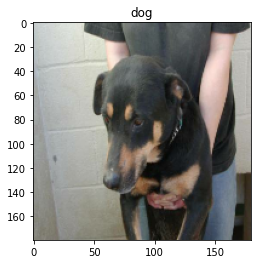

In [15]:
idx = 50
plt.imshow(test_images[idx].numpy().astype("uint8"))
plt.title(class_names[test_labels[idx].numpy()])

In [16]:
img = test_images[idx]
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

In [17]:
print(img_array.shape)
print(img_batch.shape)

(180, 180, 3)
(1, 180, 180, 3)


In [18]:
prediction = model.predict(img_batch)

In [19]:
print(class_names[prediction.argmax()])

dog


In [20]:
print(prediction)

[[6.1229494e-04 9.9938774e-01]]


### Evaluate your first model out-of-sample

In [21]:
# TODO fill-in the blank here
labels = ['cat','dog']
pre = model.predict(test_images)
pred = []
for i in range(pre.shape[0]):
  pred.append(str(pre[i].argmax()))
pred = np.array(pred)
pred = np.array(pred.astype(int))
print(classification_report(test_labels, pred, target_names = labels))

              precision    recall  f1-score   support

         cat       0.67      0.59      0.63       500
         dog       0.63      0.70      0.67       500

    accuracy                           0.65      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.65      0.65      0.65      1000



### Try different choices of epoch, batch size for your first model

In [22]:
# Type your code here
history = model.fit(
    train_dataset, 
    epochs = 30, 
    batch_size = 50, 
    validation_data = validation_dataset)

Epoch 1/30
63/63 [==============================] - 92s 1s/step - loss: 0.0261 - accuracy: 0.9910 - val_loss: 2.2692 - val_accuracy: 0.6810
Epoch 2/30
63/63 [==============================] - 85s 1s/step - loss: 0.0216 - accuracy: 0.9930 - val_loss: 2.7252 - val_accuracy: 0.6670
Epoch 3/30
63/63 [==============================] - 81s 1s/step - loss: 0.0263 - accuracy: 0.9920 - val_loss: 2.3930 - val_accuracy: 0.6990
Epoch 4/30
63/63 [==============================] - 88s 1s/step - loss: 0.0180 - accuracy: 0.9935 - val_loss: 2.1849 - val_accuracy: 0.6990
Epoch 5/30
63/63 [==============================] - 94s 1s/step - loss: 0.0069 - accuracy: 0.9980 - val_loss: 2.4956 - val_accuracy: 0.6960
Epoch 6/30
63/63 [==============================] - 77s 1s/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 2.5535 - val_accuracy: 0.7050
Epoch 7/30
63/63 [==============================] - 86s 1s/step - loss: 3.1051e-04 - accuracy: 1.0000 - val_loss: 2.5949 - val_accuracy: 0.6970
Epoch 8/30
63/63

In [23]:
labels = ['cat','dog']
pre = model.predict(test_images)
pred = []
for i in range(pre.shape[0]):
  pred.append(str(pre[i].argmax()))
pred = np.array(pred)
pred = np.array(pred.astype(int))
print(classification_report(test_labels, pred, target_names = labels))

              precision    recall  f1-score   support

         cat       0.66      0.71      0.68       500
         dog       0.69      0.64      0.66       500

    accuracy                           0.67      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.67      0.67      0.67      1000



### Try a second model with slightly different architecture (no need to be very complicated)

In [24]:
# Type your code here
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu")(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu")(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 128, kernel_size = 3, activation = "relu")(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 128, kernel_size = 3, activation = "relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters = 256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(2, activation = "softmax")(x)

model = keras.Model(inputs = inputs, outputs = outputs)

In [25]:
model.compile(loss = "SparseCategoricalCrossentropy", optimizer = "adam", metrics = ["accuracy"])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 batch_normalization_1 (Batc  (None, 180, 180, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        1849

In [26]:
# TODO test your second model on out-of-sample data
history = model.fit(
    train_dataset,
    epochs=20, 
    validation_data=validation_dataset)

Epoch 1/20
63/63 [==============================] - 66s 1s/step - loss: 0.7011 - accuracy: 0.5380 - val_loss: 0.6923 - val_accuracy: 0.5130
Epoch 2/20
63/63 [==============================] - 66s 1s/step - loss: 0.6811 - accuracy: 0.5400 - val_loss: 0.6950 - val_accuracy: 0.5060
Epoch 3/20
63/63 [==============================] - 67s 1s/step - loss: 0.6642 - accuracy: 0.5955 - val_loss: 0.6639 - val_accuracy: 0.6020
Epoch 4/20
63/63 [==============================] - 64s 1s/step - loss: 0.6318 - accuracy: 0.6340 - val_loss: 0.6087 - val_accuracy: 0.6560
Epoch 5/20
63/63 [==============================] - 64s 1s/step - loss: 0.5867 - accuracy: 0.6840 - val_loss: 0.5973 - val_accuracy: 0.6790
Epoch 6/20
63/63 [==============================] - 71s 1s/step - loss: 0.5434 - accuracy: 0.7235 - val_loss: 0.5748 - val_accuracy: 0.7170
Epoch 7/20
63/63 [==============================] - 70s 1s/step - loss: 0.4914 - accuracy: 0.7565 - val_loss: 0.5420 - val_accuracy: 0.7380
Epoch 8/20
63/63 [==

In [27]:
labels = ['cat','dog']
pre = model.predict(test_images)
pred = []
for i in range(pre.shape[0]):
  pred.append(str(pre[i].argmax()))
pred = np.array(pred)
pred = np.array(pred.astype(int))
print(classification_report(test_labels, pred, target_names = labels))

              precision    recall  f1-score   support

         cat       0.77      0.69      0.72       500
         dog       0.72      0.79      0.75       500

    accuracy                           0.74      1000
   macro avg       0.74      0.74      0.74      1000
weighted avg       0.74      0.74      0.74      1000



### Summarize your findings below

Type your answers and comments here

According to the findings, increasing the number of layers in the model is not a very good idea since it does more harm than good, because it overfits our model to the training dataset. Increasing the number epocs also overfits our model. Besides that using the perimeter tuning on the model assisted in improving the accuracy of the model.